# EDA (Descriptive Analysis)

In [91]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns

In [165]:
# Read the dataset
df = pd.read_csv("clean_data.csv")

In [166]:
df.dtypes

ID                    int64
date_review          object
day_review            int64
month_review         object
month_review_num      int64
year_review           int64
verified               bool
name                 object
month_fly            object
month_fly_num       float64
year_fly            float64
month_year_fly       object
country              object
aircraft             object
type                 object
seat_type            object
route                object
seat_comfort        float64
cabit_serv          float64
food                float64
ground_service      float64
wifi                float64
money_value           int64
recommended          object
review               object
dtype: object

In [167]:
df.month_year_fly =  pd.to_datetime(df['month_year_fly'])
df.date_review = pd.to_datetime(df['date_review'])

C:\Users\m.pham\AppData\Local\Temp\ipykernel_11968\68080361.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.month_year_fly =  pd.to_datetime(df['month_year_fly'])


In [168]:
df.dtypes

ID                           int64
date_review         datetime64[ns]
day_review                   int64
month_review                object
month_review_num             int64
year_review                  int64
verified                      bool
name                        object
month_fly                   object
month_fly_num              float64
year_fly                   float64
month_year_fly      datetime64[ns]
country                     object
aircraft                    object
type                        object
seat_type                   object
route                       object
seat_comfort               float64
cabit_serv                 float64
food                       float64
ground_service             float64
wifi                       float64
money_value                  int64
recommended                 object
review                      object
dtype: object

In [169]:
df.head()

,ID,date_review,day_review,month_review,month_review_num,year_review,verified,name,month_fly,month_fly_num,...,seat_type,route,seat_comfort,cabit_serv,food,ground_service,wifi,money_value,recommended,review
0,0,2024-03-02,2,March,3,2024,True,T Collins,February,2.0,...,Business Class,Heathrow to Oslo,4.0,5.0,5.0,5.0,NaN,5,yes,I upgraded at check in to Club Europe seat 1D ...
1,1,2024-03-01,1,March,3,2024,True,Armando Castro,June,6.0,...,Economy Class,Sydney to Porto via Singapore / London,NaN,NaN,NaN,NaN,NaN,1,no,"I bought a return trip with BA, through Webjet..."
2,2,2024-02-29,29,February,2,2024,True,Simon Channon,February,2.0,...,Economy Class,London Heathrow to Lisbon,1.0,3.0,1.0,2.0,NaN,3,no,Poor from start to finish. Six months after pu...
3,3,2024-02-29,29,February,2,2024,True,C Allen,February,2.0,...,Premium Economy,Madrid to London via Buenos Aires,1.0,3.0,NaN,1.0,NaN,1,no,Communication and customer service non existen...
4,4,2024-02-23,23,February,2,2024,True,Peter Hansell,September,9.0,...,Economy Class,Pisa to London Heathrow,NaN,NaN,NaN,NaN,NaN,1,no,That was supposed to be my flight but it was c...


## General Analysis

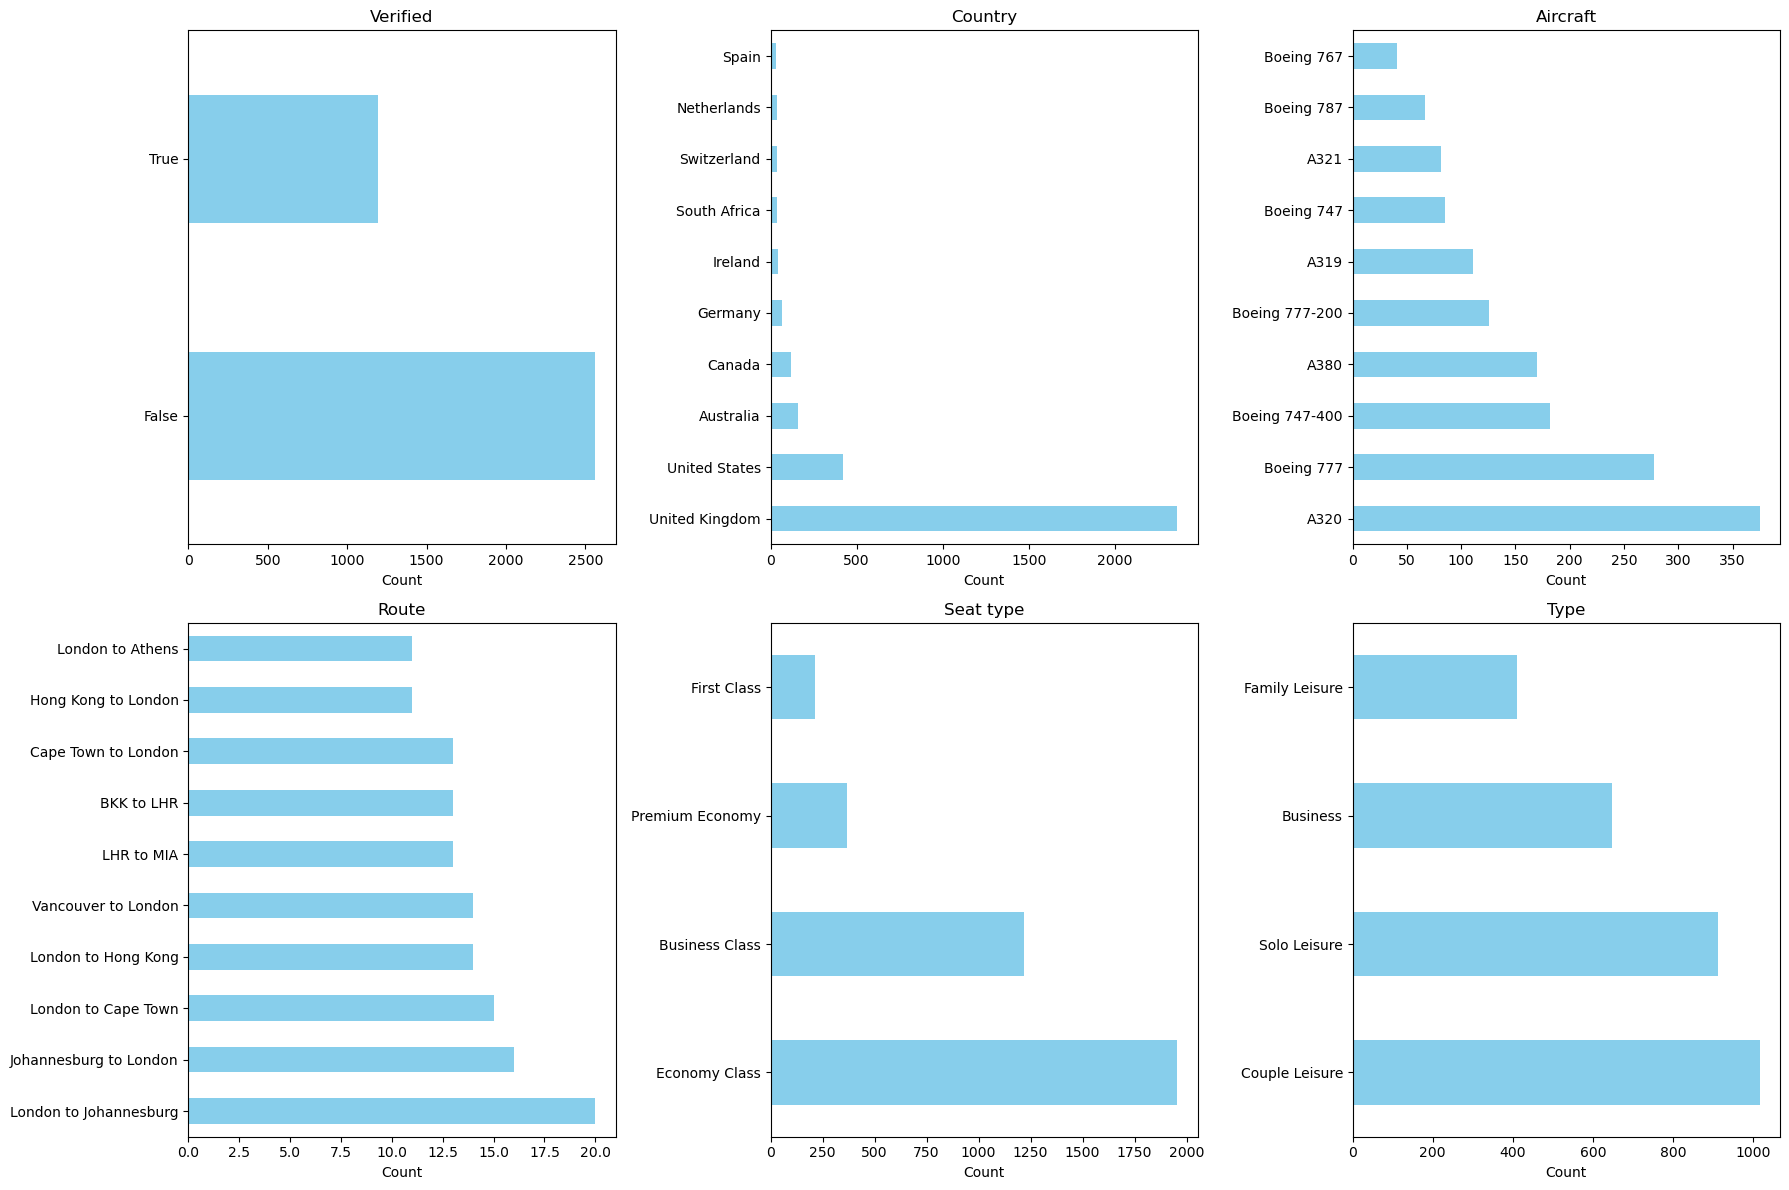

In [170]:
# List of columns to plot
columns_to_plot = ['verified', 'country', 'aircraft', 'route', 'seat_type', 'type']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))  # Adjusted the subplot grid size

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each column and plot
for i, column in enumerate(columns_to_plot):
    # Exclude NaN values
    filtered_data = df[column].dropna()
    
    # Count occurrences of each value and select top 10
    top_10_counts = filtered_data.value_counts().head(10).sort_values(ascending=True)
    
    # Plot the data
    top_10_counts.plot(kind='barh', ax=axes[i], color='skyblue')
    
    # Add titles and labels
    axes[i].set_title(column.capitalize().replace('_', ' '))
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('')
    axes[i].invert_yaxis()  # Invert y-axis to display highest count at the top

# Hide the remaining subplots if the number of columns to plot is less than the total number of subplots
for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

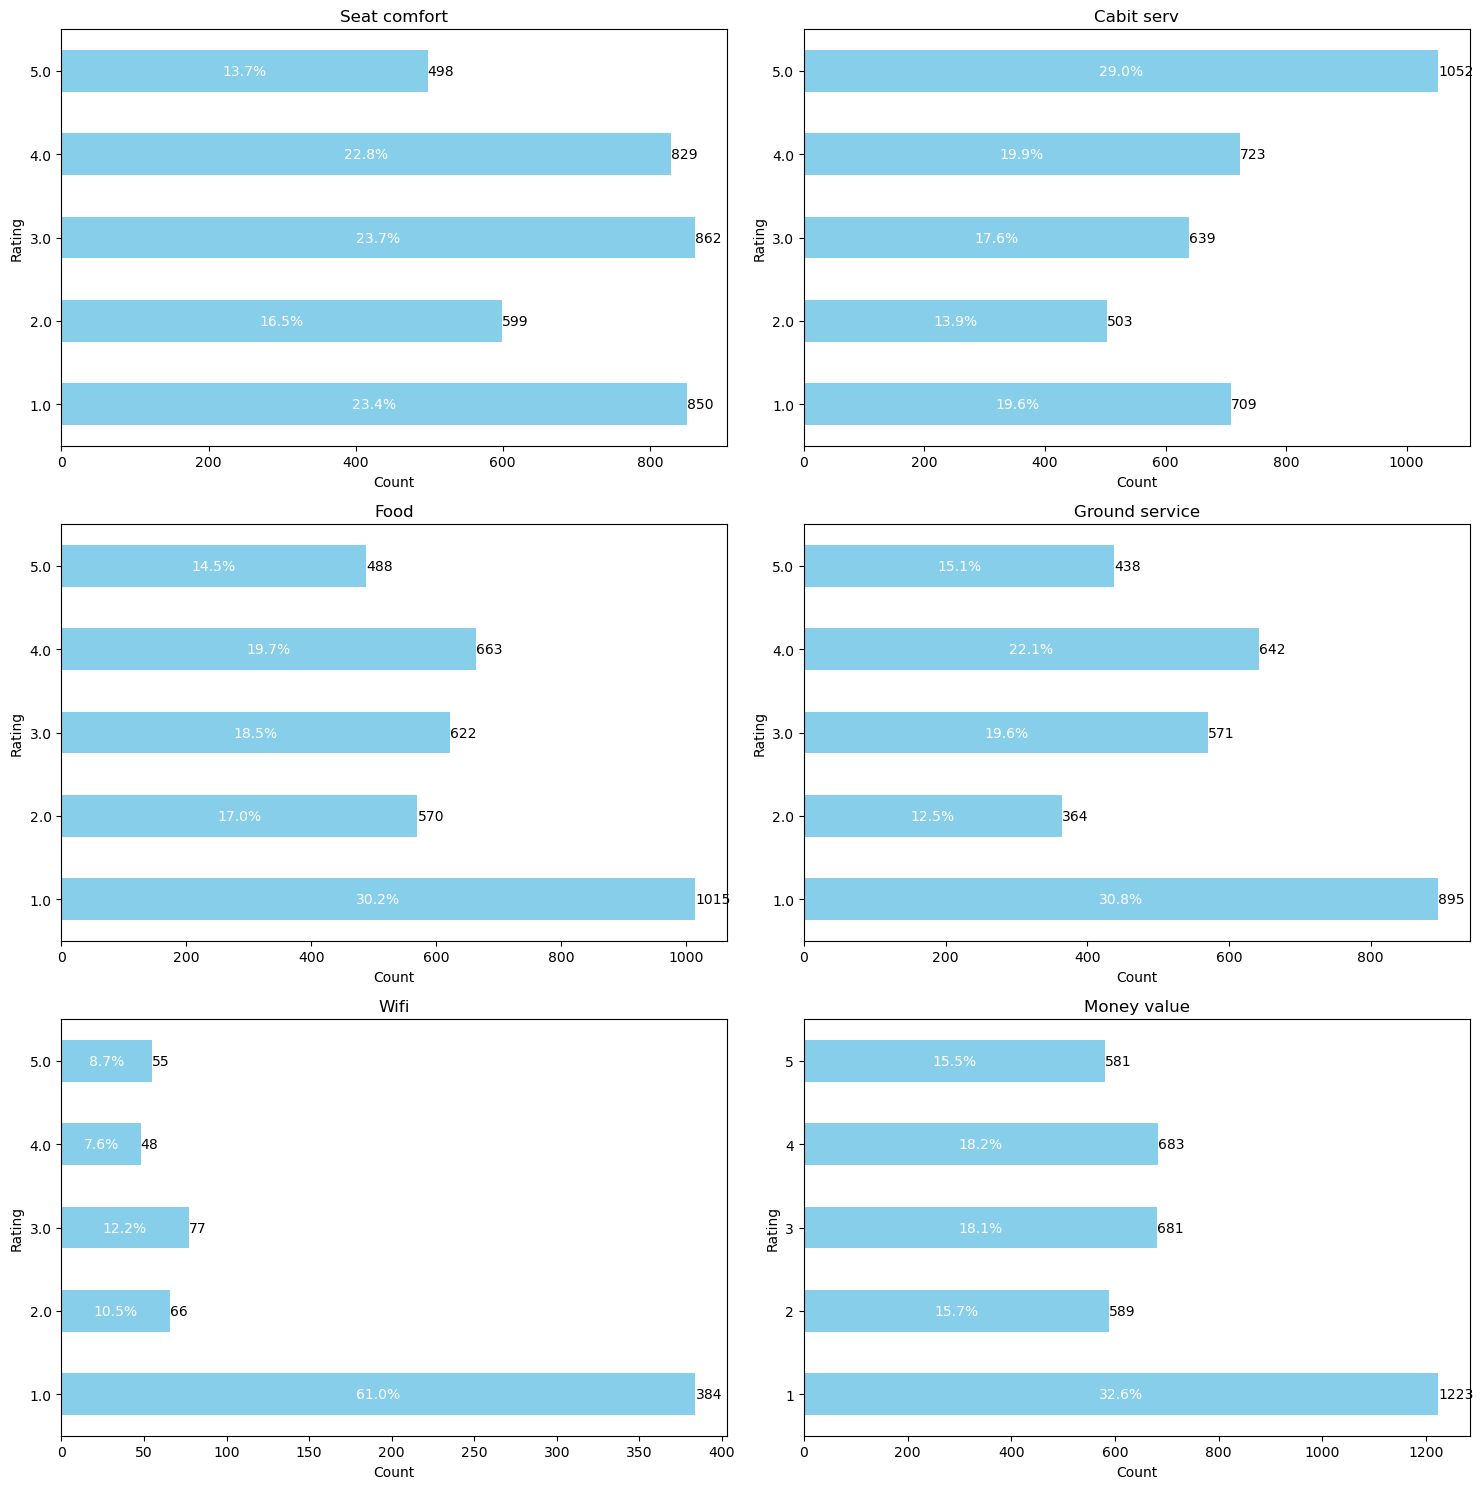

In [171]:
# Define the list of columns
columns = ['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi', 'money_value']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each column and plot
for i, column in enumerate(columns):
    # Exclude 0 values for 'food' and 'money_value' columns
    if column in ['food', 'money_value']:
        filtered_data = df[df[column] > 0]
        counts = filtered_data[column].value_counts().sort_index()
    else:
        counts = df[column].value_counts().sort_index()
    
    # Plot the data horizontally
    counts.plot(kind='barh', ax=axes[i], color='skyblue')
    
    # Add titles and labels
    axes[i].set_title(column.capitalize().replace('_', ' '))
    axes[i].set_ylabel('Rating')
    axes[i].set_xlabel('Count')
    
    # Calculate percentage of total
    total_count = counts.sum()
    for j, (index, value) in enumerate(counts.items()):
        # Add percentage at the middle of the bar
        percentage = '{:.1f}%'.format(100 * value / total_count)
        axes[i].text(value / 2, j, percentage, ha='center', va='center', color='white')
        
        # Add total count at the right of the bar
        axes[i].text(value, j, str(value), ha='left', va='center', color='black')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [172]:
# Define the list of columns
columns = ['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi', 'money_value']

# Create a dictionary to store summary statistics for each column
summary_statistics = {}

# Compute summary statistics for each column
for column in columns:
    # Compute summary statistics for the current column
    summary_statistics[column] = df[column].describe()

# Create a DataFrame to store the summary statistics
summary_df = pd.DataFrame(summary_statistics)
summary_df

,seat_comfort,cabit_serv,food,ground_service,wifi,money_value
count,3638.000000,3626.000000,3359.000000,2910.000000,630.000000,3758.000000
mean,2.869709,3.249862,2.713010,2.781443,1.926984,2.682544
std,1.363155,1.489608,1.441467,1.459785,1.348992,1.469980
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,4.000000,5.000000,4.000000,4.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Score Analysis

In [173]:
# Calculate the average score (Assume the weight is equal)
df['score'] = df[['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi']].mean(axis=1)


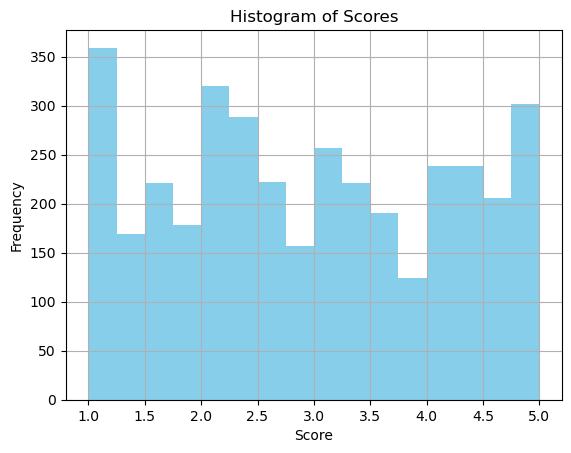

In [174]:
# Plot histogram of scores
df['score'].hist(bins=16, color='skyblue')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.show()

In [175]:
score_summary = df['score'].describe()

# Print the summary statistics
print("Summary Statistics for the 'Score' column:")
print(score_summary)

Summary Statistics for the 'Score' column:
count    3690.000000
mean        2.875285
std         1.219589
min         1.000000
25%         1.800000
50%         2.750000
75%         4.000000
max         5.000000
Name: score, dtype: float64


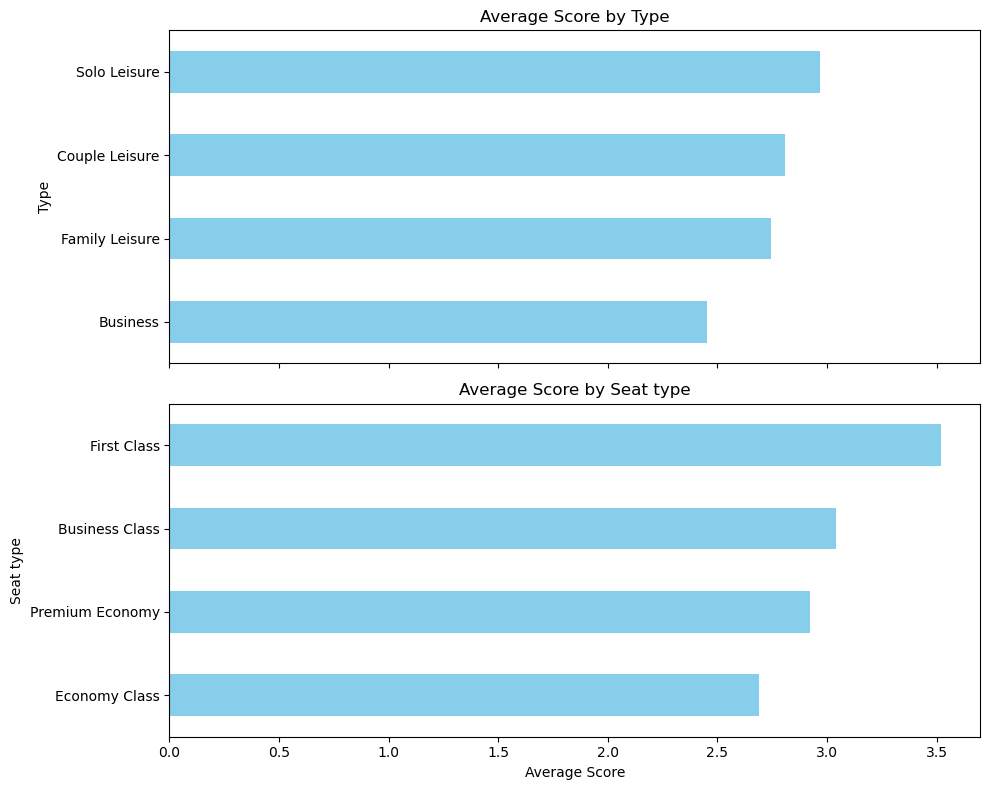

In [176]:
# List of columns to analyze
columns_to_analyze = ['type', 'seat_type']

# Create subplots
fig, axes = plt.subplots(nrows=len(columns_to_analyze), figsize=(10, 8), sharex=True)

# Iterate over each column and plot
for i, column in enumerate(columns_to_analyze):
    # Group by the column and calculate the mean score
    average_score_by_category = df.groupby(column)['score'].mean().sort_values()
    
    # Plot the average score for each category
    average_score_by_category.plot(kind='barh', ax=axes[i], color='skyblue')
    
    # Set title and labels
    axes[i].set_title(f'Average Score by {column.replace("_", " ").capitalize()}')
    axes[i].set_ylabel(column.replace("_", " ").capitalize())
    axes[i].set_xlabel('Average Score')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [177]:
def plot_top_bottom_bar(df, column_name, title):
    # Calculate the average score and count for each category in the specified column
    group_data = df.groupby(column_name)['score'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
    top_bottom_data = pd.concat([group_data.head(5), group_data.tail(5)])

    # Get the number of categories
    num_categories = len(top_bottom_data)

    # Set the width of the bars
    bar_width = 0.35

    # Set the positions of the bars on the x-axis
    index = np.arange(num_categories)

    # Plot the average score and count for selected categories using a clustered bar chart
    plt.figure(figsize=(20, 10))

    # Plot bars for average score
    plt.bar(index, top_bottom_data['mean'], bar_width, color='gray', label='Average Score')

    # Plot bars for count
    plt.bar(index + bar_width, top_bottom_data['count'], bar_width, color='lightblue', alpha=0.5, label='Count')

    # Color the bars for top and bottom categories
    for i in range(num_categories):
        if top_bottom_data.index[i] in group_data.head(5).index:
            plt.gca().get_children()[i].set_color('green')  # Color top categories green
            plt.gca().get_children()[i + num_categories].set_color('green')
        else:
            plt.gca().get_children()[i].set_color('red')  # Color bottom categories red
            plt.gca().get_children()[i + num_categories].set_color('red')

    plt.xlabel(column_name)
    plt.ylabel('Average Score / Count')
    plt.title(f'Average Score and Count by {title}')
    plt.xticks(index + bar_width / 2, top_bottom_data.index, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()

    plt.show()

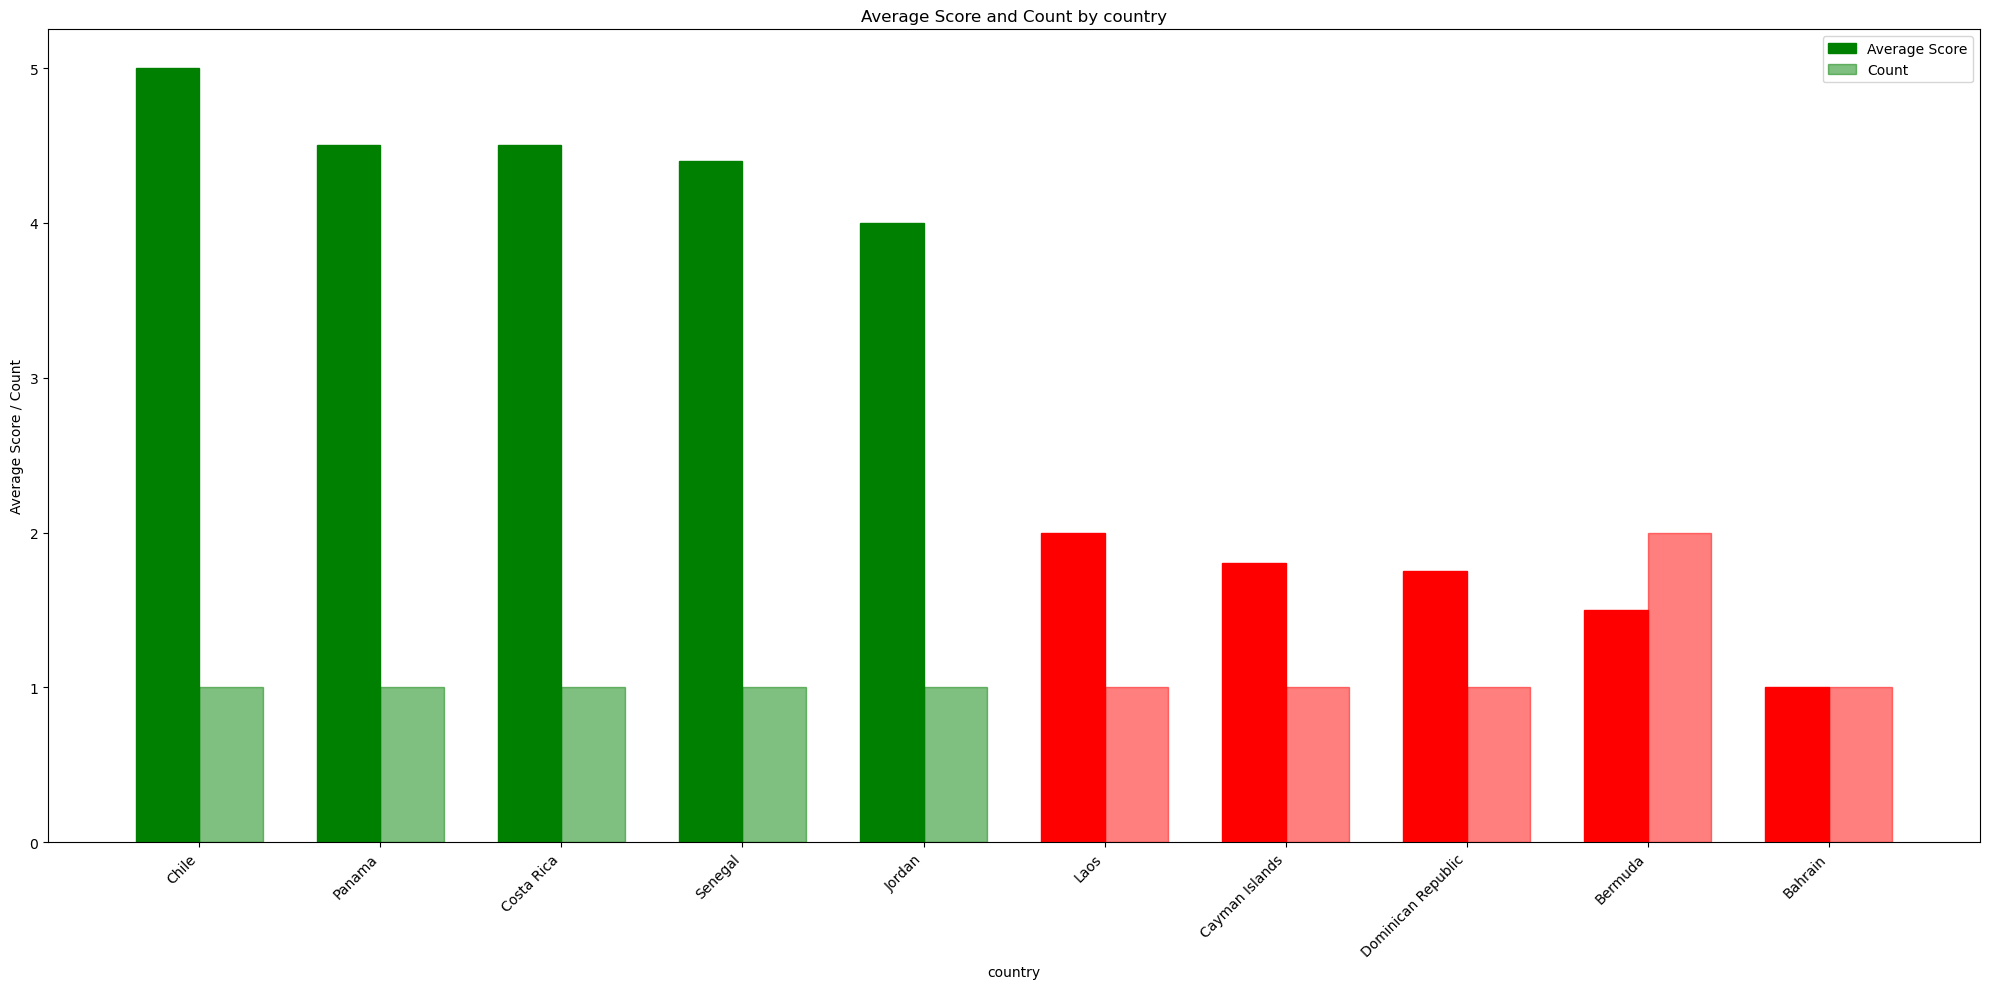

In [178]:
plot_top_bottom_bar(df, "country", "country")

In [179]:
def plot_significant_bar(df, column_name, title, review_count_threshold):
    # Filter the DataFrame to include only countries with count > review_count_threshold
    filtered_df = df.groupby(column_name).filter(lambda x: len(x) > review_count_threshold)

    # Calculate the average score for each category in the specified column
    average_score_by_category = filtered_df.groupby(column_name)['score'].mean().sort_values()

    # Plot the average score for each category using a bar chart
    plt.figure(figsize=(20, 10))

    # Use subplot with adjustable box to enable scrolling
    plt.subplot(111, aspect='auto')
    plt.barh(average_score_by_category.index, average_score_by_category, color='skyblue')
    plt.xlabel('Average Score')
    plt.ylabel(column_name)
    plt.title(f'Average Score by {title} that have number of review> {review_count_threshold}')
    plt.gca().invert_yaxis()  # Invert y-axis to display highest average score at the top
    plt.tight_layout()

    # Enable interactive scrolling
    plt.subplots_adjust(left=0.25, right=0.9, top=0.9, bottom=0.1)
    plt.show()

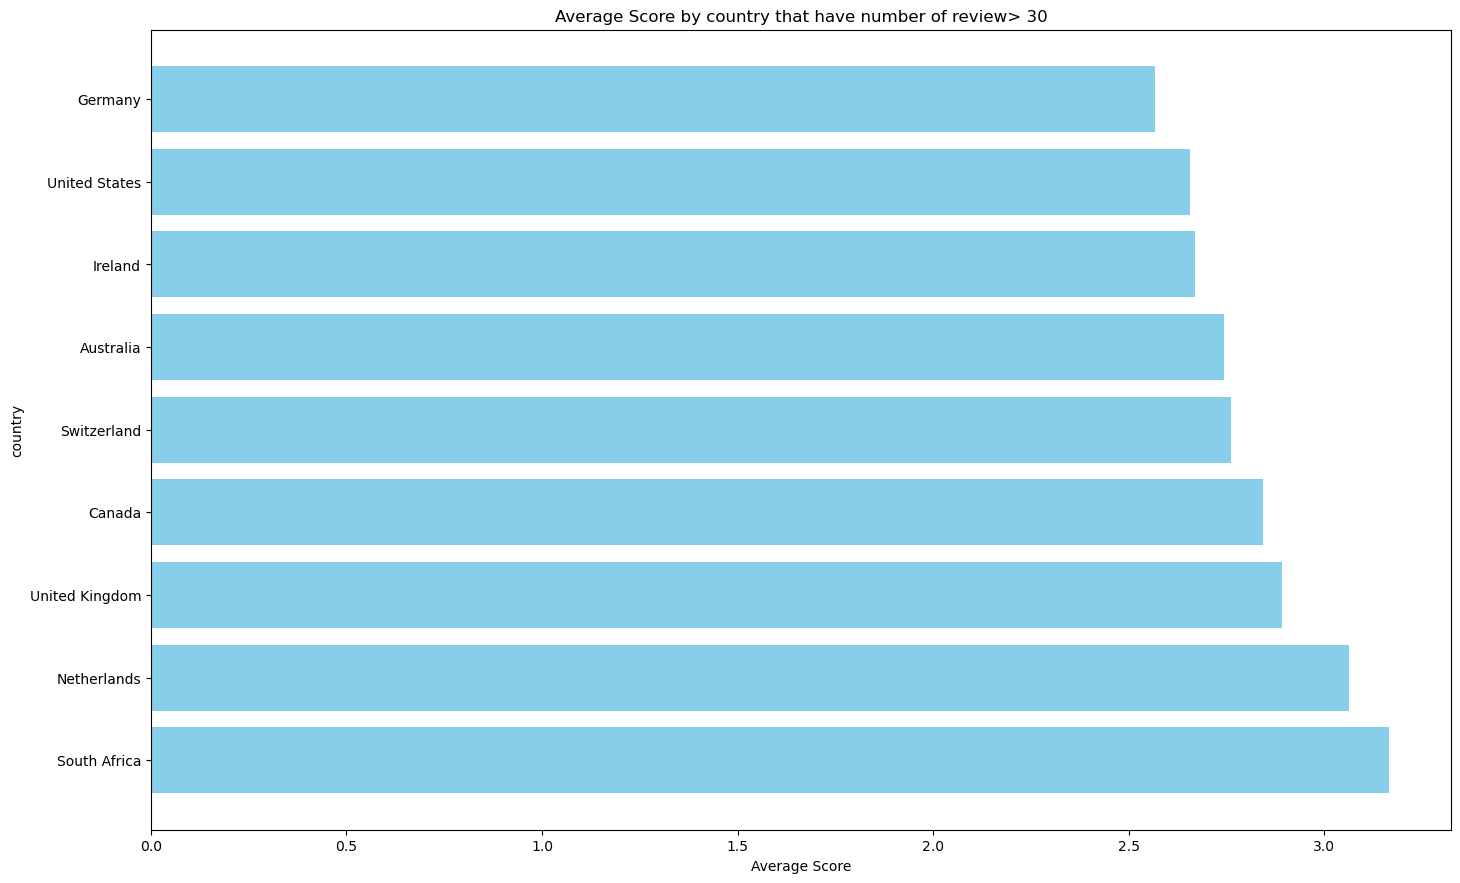

In [180]:
plot_significant_bar(df, "country", "country", 30)

## Service Analysis 

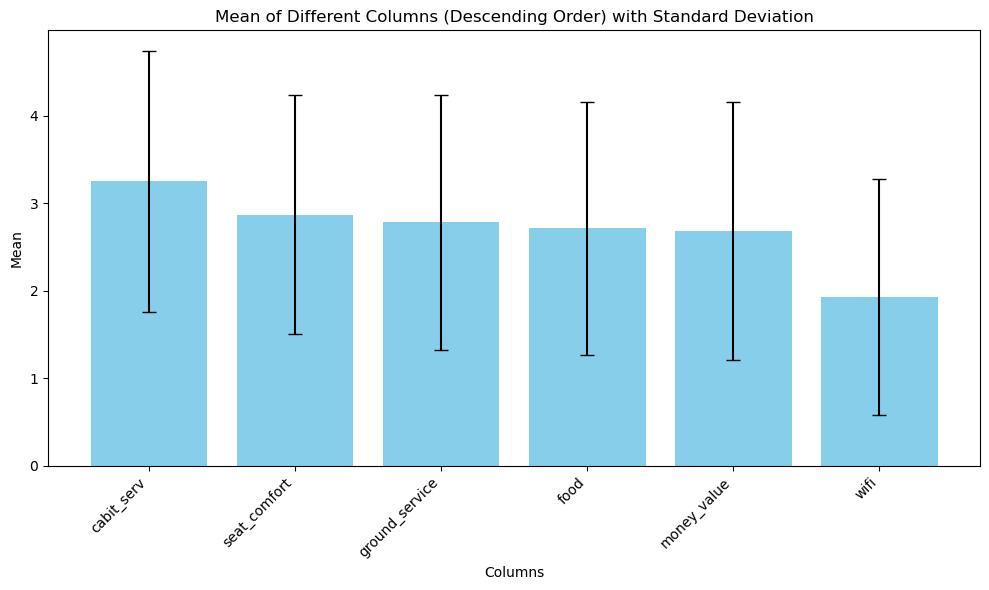

In [181]:
# Define the list of columns
columns = ['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi', 'money_value']

# Create a dictionary to store summary statistics for each column
summary_statistics = {}

# Compute summary statistics for each column
for column in columns:
    # Compute summary statistics for the current column
    summary_statistics[column] = df[column].describe()

# Extract the mean values and standard deviations for each column
means = [summary_statistics[column]['mean'] for column in columns]
stds = [summary_statistics[column]['std'] for column in columns]

# Sort the means and columns in descending order
sorted_means, sorted_columns = zip(*sorted(zip(means, columns), reverse=True))
sorted_stds = [summary_statistics[column]['std'] for column in sorted_columns]

# Plot the means of each column in descending order with error bars
plt.figure(figsize=(10, 6))
plt.bar(sorted_columns, sorted_means, color='skyblue', yerr=sorted_stds, capsize=5)  # Add error bars with std
plt.xlabel('Columns')
plt.ylabel('Mean')
plt.title('Mean of Different Columns (Descending Order) with Standard Deviation')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


### Food and Beverages Analysis

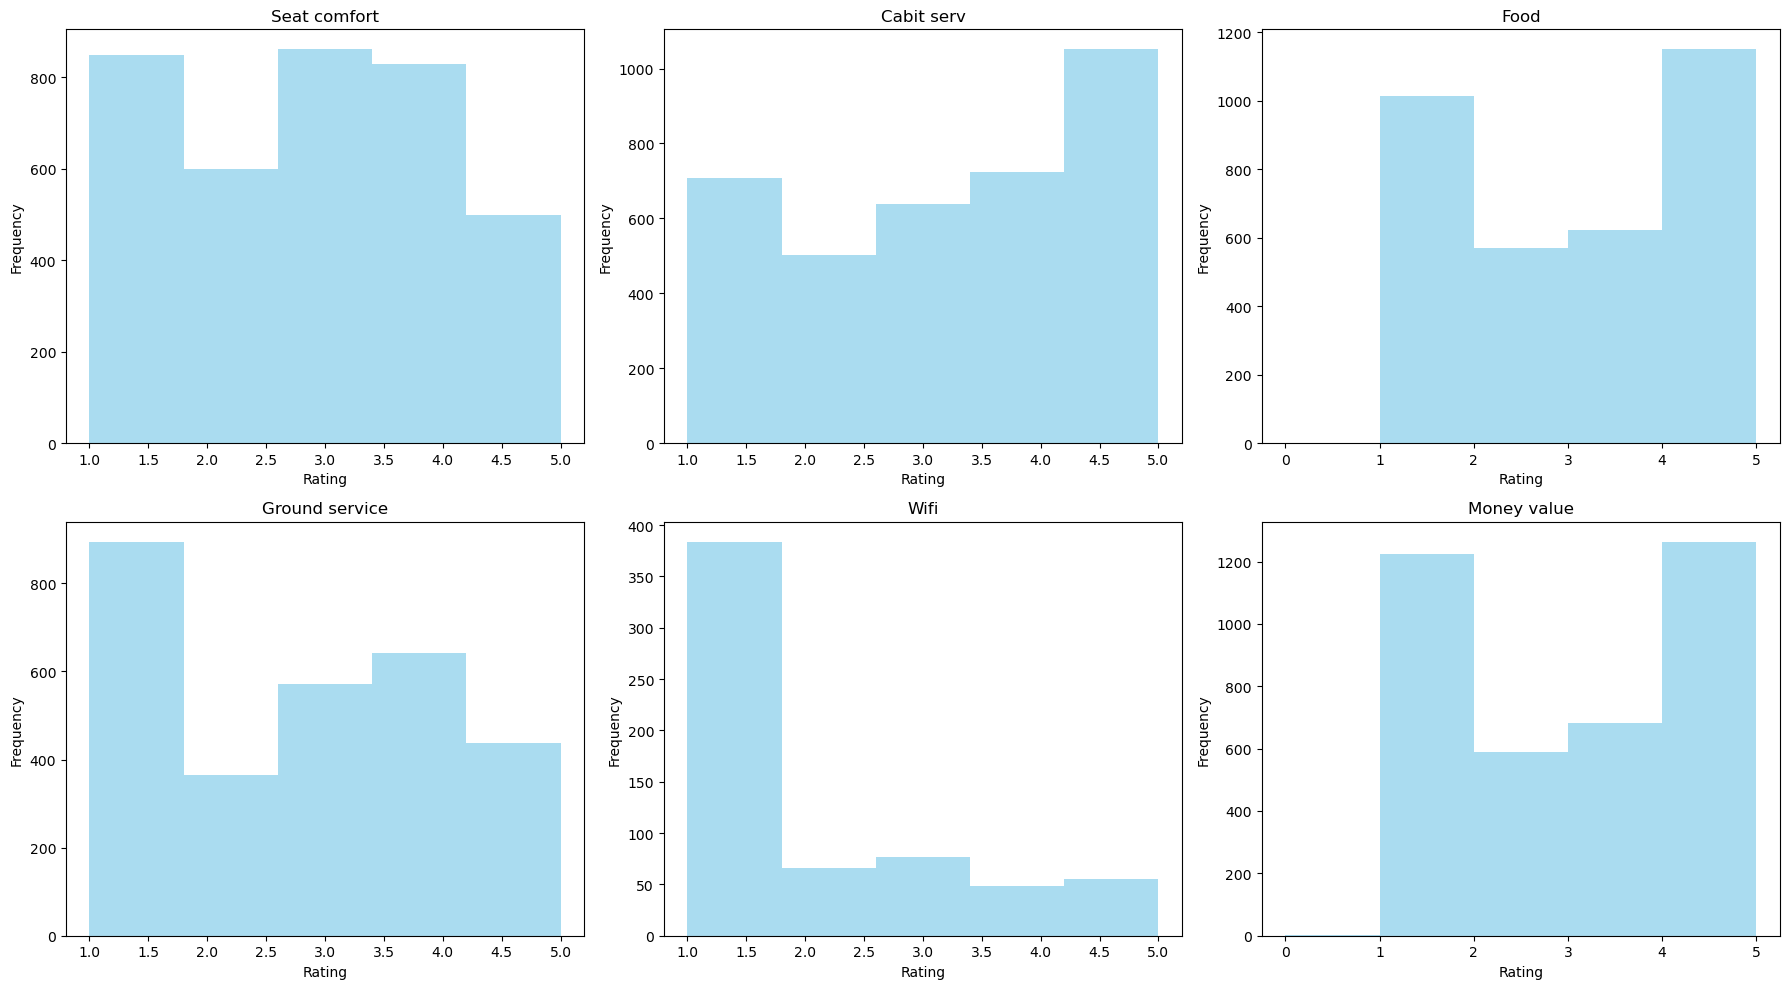

In [182]:
# Define columns of interest
columns = ['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi', 'money_value']

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each column and plot histograms
for i, column in enumerate(columns):
    axes[i].hist(df[column], bins=5, color='skyblue', alpha=0.7)
    axes[i].set_title(column.replace("_", " ").capitalize())
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


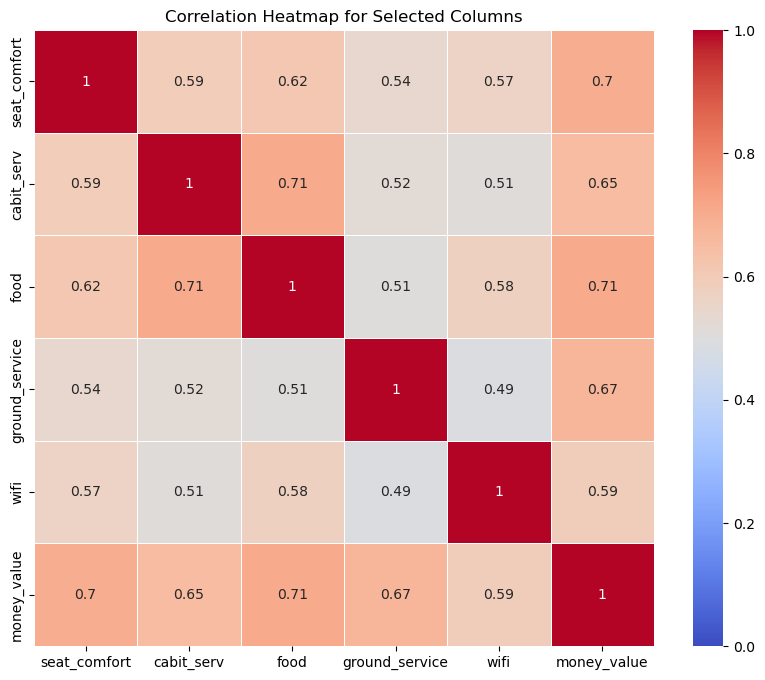

In [183]:
# Select only the columns of interest
df_selected = df[columns]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Create a heatmap with color scale from 0 to 1
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=0, vmax=1)
plt.title('Correlation Heatmap for Selected Columns')
plt.show()

In [184]:
# Slice by econ and non_econ 

### Seat Comfort Analysis

In [185]:
### Break this chart down --> Slice by plane

## TIme Series Analysis

### General Time Time Series

In [186]:
# Convert 'Month Year Flown' column to datetime data type
df['month_year_fly'] = pd.to_datetime(df['month_year_fly'])

In [187]:
df['month_year_fly']

0      2024-02-01
1      2023-06-01
2      2024-02-01
3      2024-02-01
4      2023-09-01
          ...    
3753          NaT
3754          NaT
3755          NaT
3756          NaT
3757          NaT
Name: month_year_fly, Length: 3758, dtype: datetime64[ns]

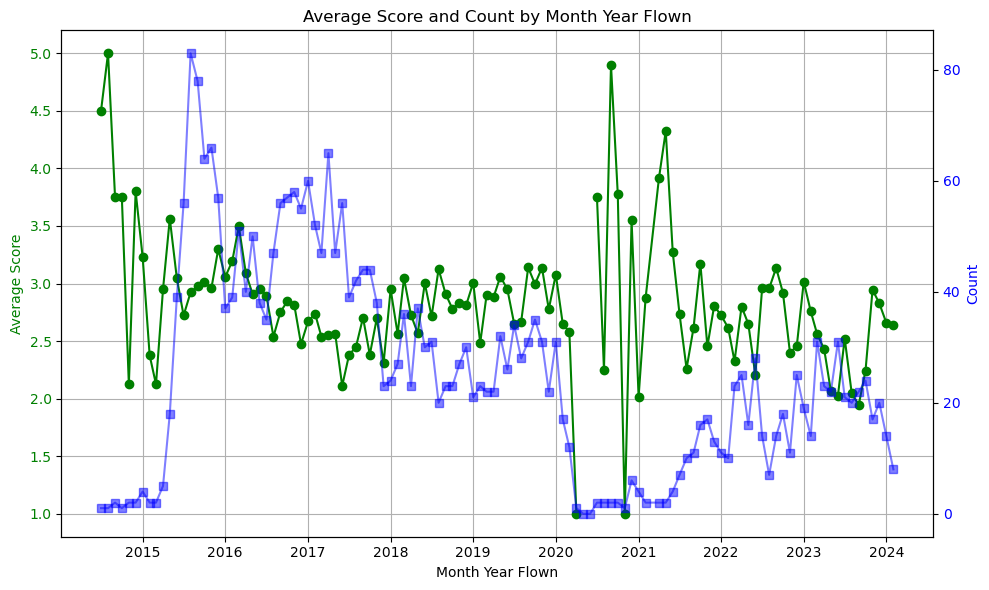

In [188]:
# Drop NaN values from the 'month_year_fly' column
df_filtered = df.dropna(subset=['month_year_fly'])

# Calculate the average score and count for each 'Month Year Flown'
average_score_and_count_by_month_year = df_filtered.groupby('month_year_fly')['score'].agg(['mean', 'count'])

# Sort the index to ensure the line plot is ordered by date
average_score_and_count_by_month_year = average_score_and_count_by_month_year.sort_index()

# Plot the average score for each date using a line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average score
color1 = 'green'
ax1.set_xlabel('Month Year Flown')
ax1.set_ylabel('Average Score', color=color1)
ax1.plot(average_score_and_count_by_month_year.index, average_score_and_count_by_month_year['mean'], color=color1, marker='o', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color1)

# Create a second y-axis for the count
ax2 = ax1.twinx()
color2 = 'blue'
ax2.set_ylabel('Count', color=color2)
ax2.plot(average_score_and_count_by_month_year.index, average_score_and_count_by_month_year['count'], color=color2, marker='s', linestyle='-', alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color2)

# Add title and rotate x-axis labels
plt.title('Average Score and Count by Month Year Flown')
plt.xticks(rotation=45)

# Add gridlines to the plot
ax1.grid(True)

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()


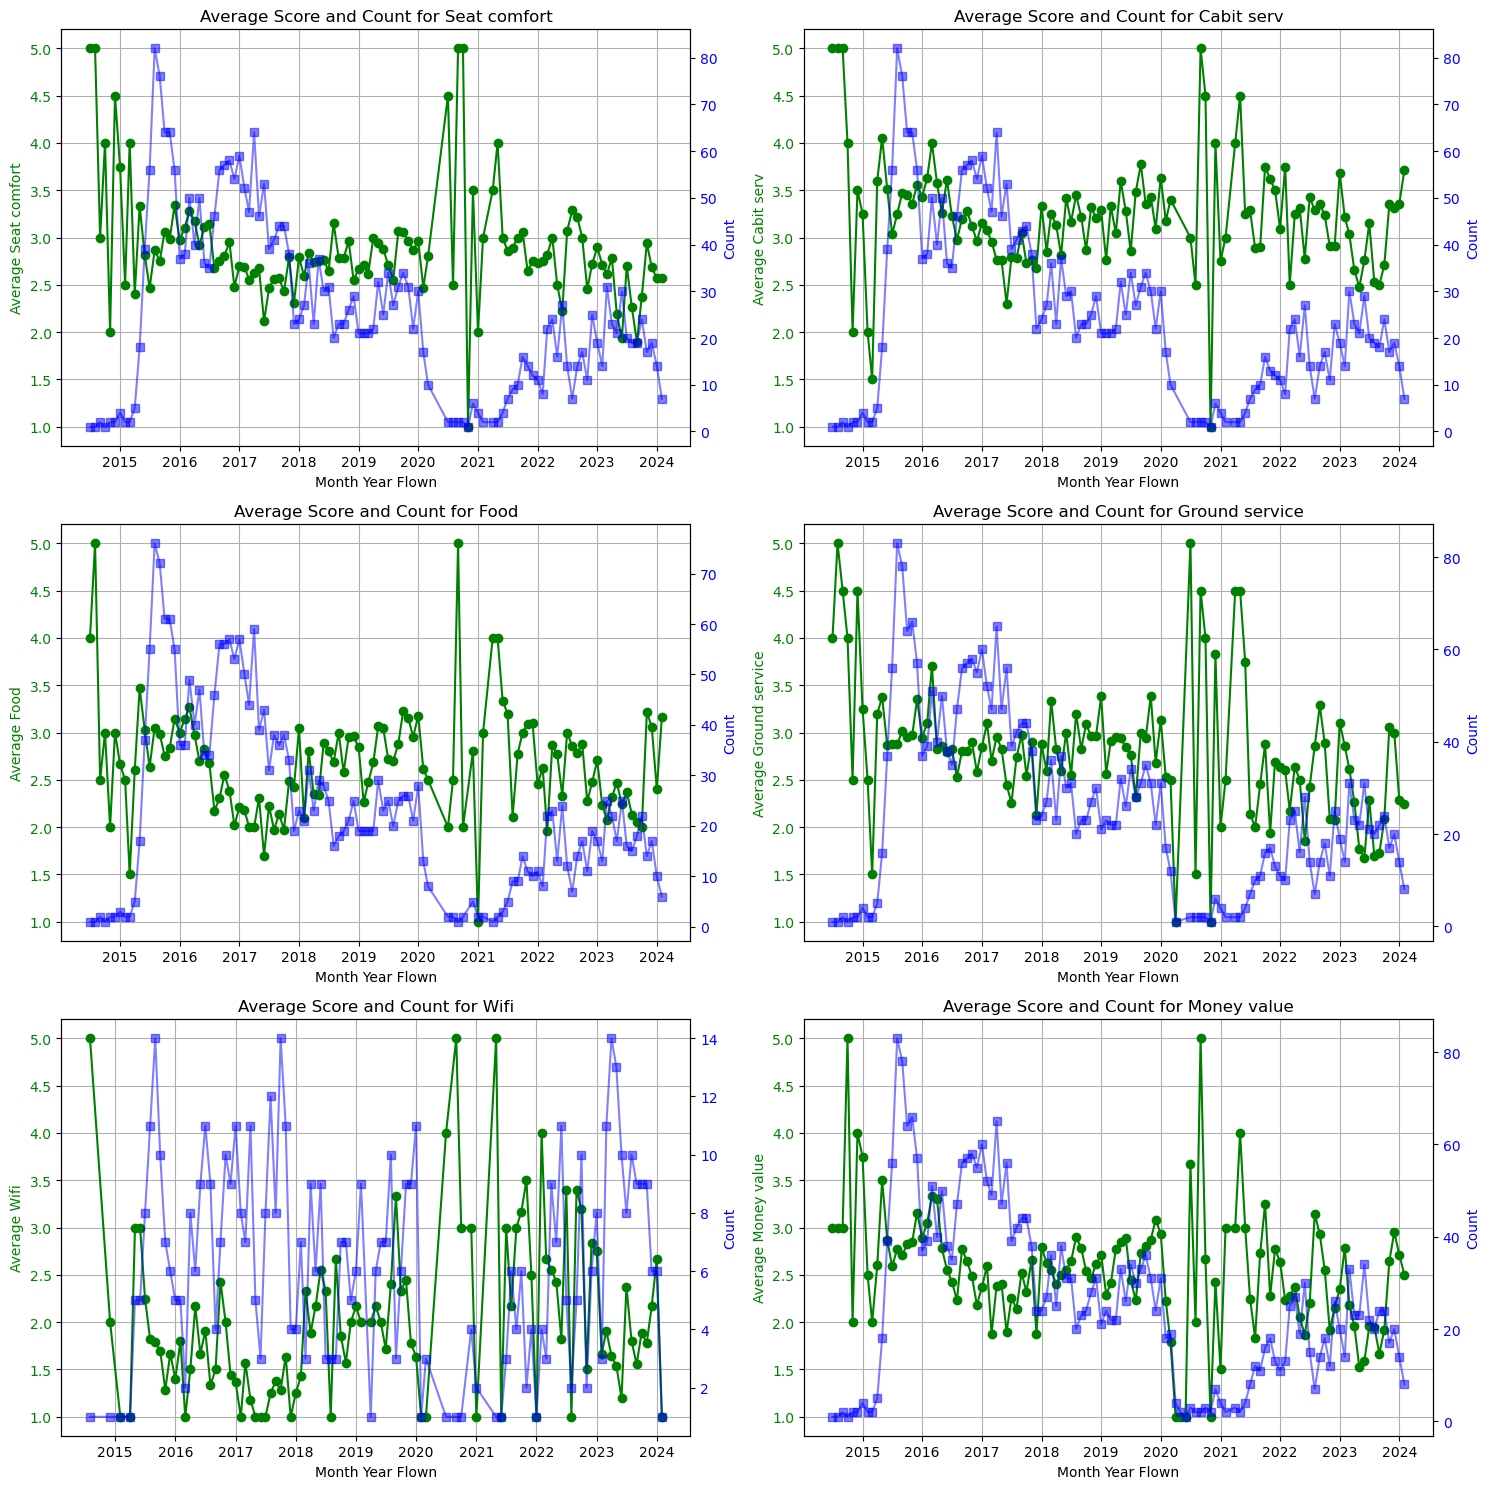

In [189]:
# Define the list of columns
columns_to_plot = ['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi', 'money_value']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Iterate over each column and plot the average score and count by date flown
for i, column in enumerate(columns_to_plot):
    # Filter out NaN values in the specified column
    filtered_data = df.dropna(subset=['month_year_fly', column])
    
    # Group by 'Month Year Flown' to calculate the average and count
    average_score_and_count = filtered_data.groupby('month_year_fly')[column].agg(['mean', 'count'])
    average_score_and_count = average_score_and_count.sort_index()

    # Plot the average score for each date using a line plot
    color1 = 'green'
    axes[i].plot(average_score_and_count.index, average_score_and_count['mean'], marker='o', color=color1, linestyle='-')
    axes[i].set_xlabel('Month Year Flown')
    axes[i].set_ylabel('Average ' + column.replace("_", " ").capitalize(), color=color1)
    axes[i].tick_params(axis='y', labelcolor=color1)
    axes[i].grid(True)

    # Plot the count for each date using a line plot
    ax2 = axes[i].twinx()
    color2 = 'blue'
    ax2.plot(average_score_and_count.index, average_score_and_count['count'], color=color2, linestyle='-', marker='s', alpha=0.5)
    ax2.set_ylabel('Count', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)

    axes[i].set_title('Average Score and Count for ' + column.replace("_", " ").capitalize())

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


### Monthly Time Series

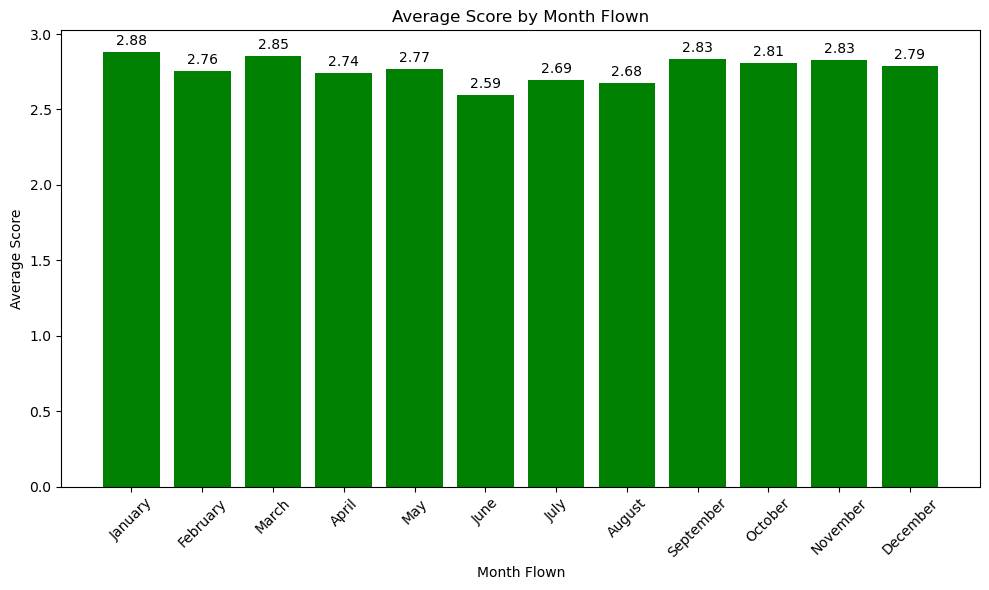

In [190]:
# Calculate the average score for each month
average_score_by_month = df.groupby('month_fly_num')['score'].mean()

# Sort the index to ensure the bar chart is ordered by month
average_score_by_month = average_score_by_month.sort_index()

# Get month names to use as labels
month_names = df.groupby('month_fly_num')['month_fly'].first()

# Plot the average score for each month using a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(month_names, average_score_by_month, color='green')
plt.xlabel('Month Flown')
plt.ylabel('Average Score')
plt.title('Average Score by Month Flown')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Add labels to the top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(round(height, 2)),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


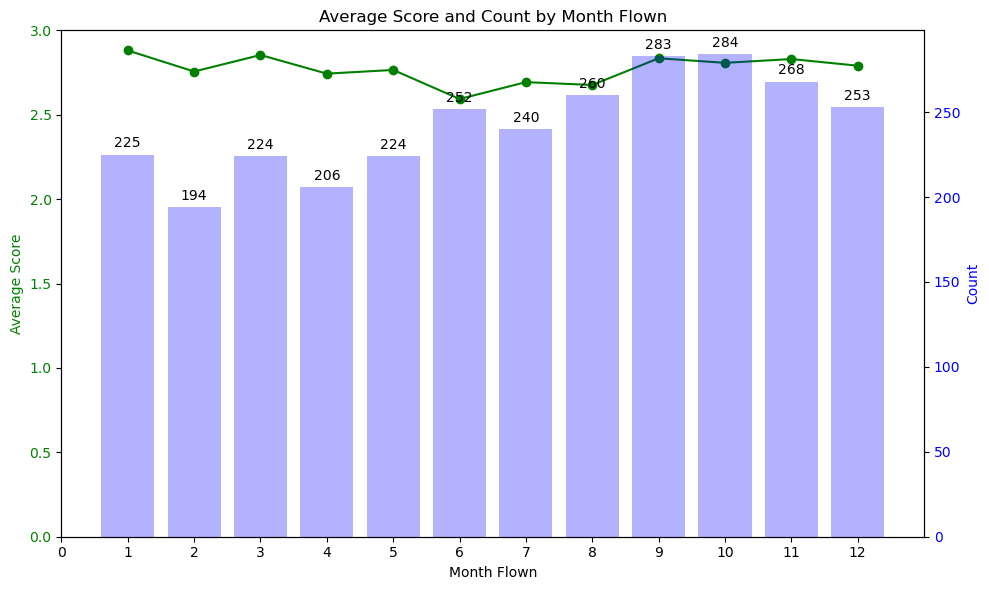

In [191]:
# Filter out NaN values from the 'Month Flown' column and calculate the average score and count for each month
average_score_and_count_by_month = df.dropna(subset=['month_fly_num']).groupby('month_fly_num')['score'].agg(['mean', 'count'])

# Sort the index to ensure the line plot is ordered by date
average_score_and_count_by_month = average_score_and_count_by_month.sort_index()

# Plot the average score for each date using a line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average score
color = 'green'
ax1.set_xlabel('Month Flown')
ax1.set_ylabel('Average Score', color=color)
ax1.plot(average_score_and_count_by_month.index, average_score_and_count_by_month['mean'], color=color, marker='o', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

# Set y-axis limit from 0 to 3
ax1.set_ylim(0, 3)

# Create a second y-axis for the count
ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('Count', color=color)
bars = ax2.bar(average_score_and_count_by_month.index, average_score_and_count_by_month['count'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

# Add labels to the top of the bars
for bar in bars:
    height = bar.get_height()
    ax2.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Add title and rotate x-axis labels
plt.title('Average Score and Count by Month Flown')
plt.xticks(range(13))  # Set x-axis ticks from 0 to 12
plt.xlim(0, 13)  # Set x-axis limit to start from 0 and end at 12

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()
